In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

In [2]:
audio_file=glob('./ravedss-audio/*/*.wav')

In [3]:
ipd.Audio(audio_file[0])

In [4]:
y,sr = librosa.load(audio_file[0])
y_values=[]
sr_values=[]

In [5]:
y

array([ 5.3765390e-08, -2.1233145e-08, -6.0478342e-09, ...,
        4.8083174e-14, -9.6233243e-15,  2.8714739e-14], dtype=float32)

In [6]:
    sr

22050

<Axes: title={'center': 'Raw Audio example'}>

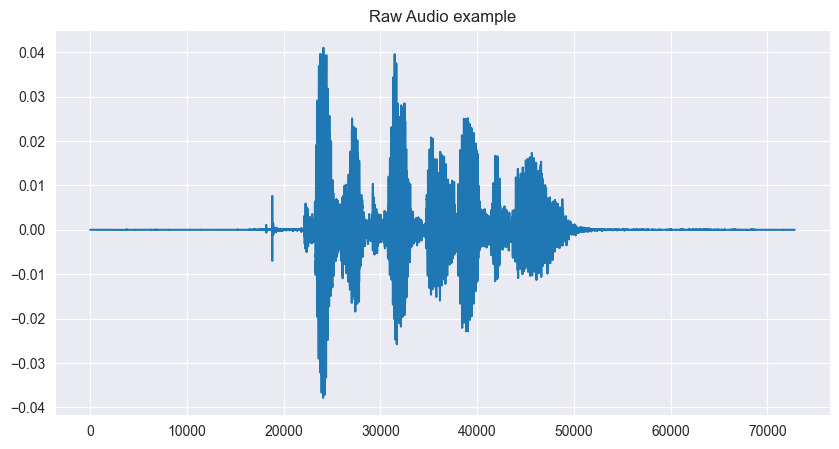

In [7]:
pd.Series(y).plot(figsize=(10,5),title='Raw Audio example')

In [8]:
y_trimmed,_ = librosa.effects.trim(y,top_db=50) 


In [9]:
y_trimmed

array([-1.3339210e-06,  3.3980346e-06,  1.2099962e-05, ...,
       -4.2286600e-05, -2.5735546e-05, -4.1742449e-05], dtype=float32)

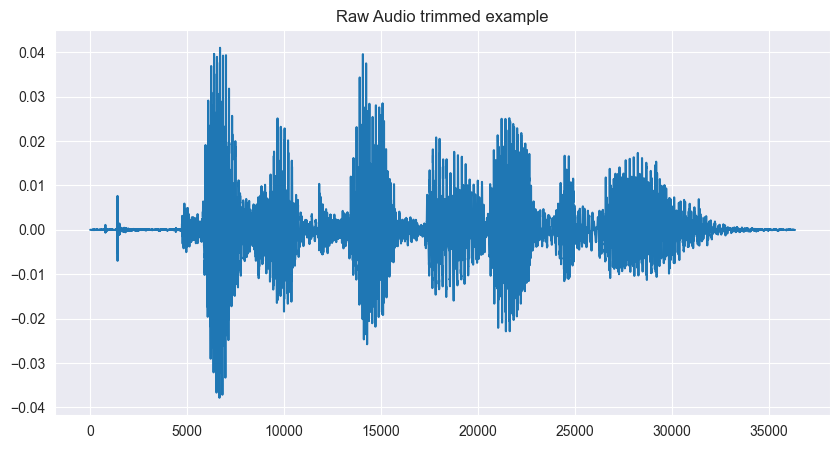

In [10]:
pd.Series(y_trimmed).plot(kind='line', figsize=(10,5), title='Raw Audio trimmed example')
plt.show()


In [11]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D),ref =np.max)
## S_db gives us a data which could be fed into a machine learning model

In [12]:
S_db.shape

(1025, 143)

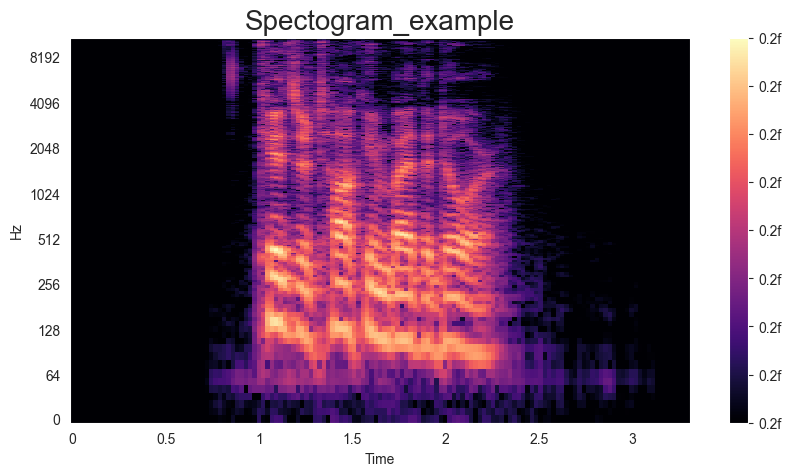

In [13]:
fig, ax = plt.subplots(figsize= (10,5))
img = librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Spectogram_example',fontsize=20)
fig.colorbar(img, ax=ax,format=f'0.2f')
plt.show()

In [14]:
S_db

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [15]:
S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128)


In [16]:
S_db_mel=librosa.amplitude_to_db(S,ref=np.max)

In [17]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

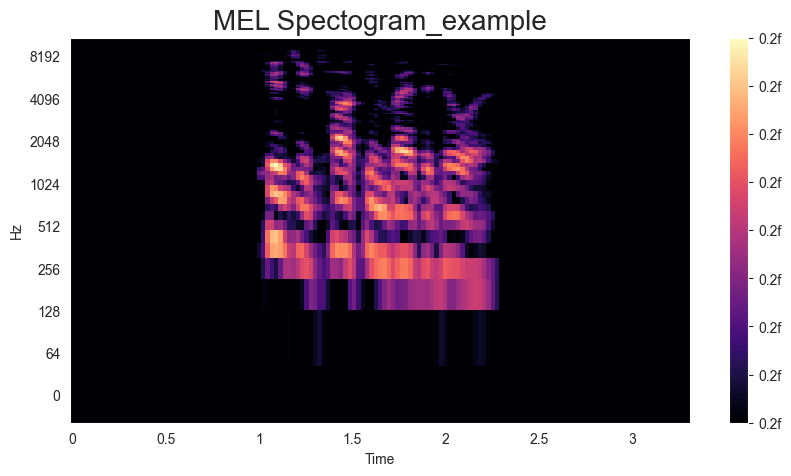

In [18]:
fig, ax = plt.subplots(figsize= (10,5))
img1 = librosa.display.specshow(S_db_mel,x_axis='time',y_axis='log',ax=ax)
ax.set_title('MEL Spectogram_example',fontsize=20)
fig.colorbar(img, ax=ax,format=f'0.2f')
plt.show()

In [19]:
S_db_mel

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

In [20]:
mean_row = S_db_mel.mean(axis=0)   ##  mean across frequency band 

In [21]:
mean_row_df = pd.DataFrame(mean_row).T

In [22]:
mean_row_df ## this is the input we give the network from a single audio signal.

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0


In [25]:
processed_df=pd.DataFrame()
for file in audio_file:
    y,sr=librosa.load(file)
    y_trimmed,_ = librosa.effects.trim(y,top_db=50)
    S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128)
    S_db_mel=librosa.amplitude_to_db(S,ref=np.max)
    mean_row = S_db_mel.mean(axis=0)
    mean_row_df = pd.DataFrame(mean_row).T
    processed_df = mean_row_df if processed_df.empty else pd.concat([processed_df, mean_row_df])



In [26]:
processed_df

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
